In [75]:
import numpy as np


In [76]:
class RidgeRegression:
    def __init__(self, alpha: int = 1.0, lr: int = 0.01, n_iters: int = 1000):
        #alpha here is our regularization parameter, if alpha = 0 then we have a simple linear regression and if alpha = infinity then we have a constant model (all weights are 0)
        self.alpha = alpha
        self.weights = None
        self.bias = None
        self.lr = lr
        self.n_iters = n_iters
    
    def fit(self, X, y):
        # initialize the sample(x) and the features(y) array
        num_samples, num_features = X.shape
        # initialize the weights array randomly of size num_features
        self.weights = np.zeros( num_features )
        self.bias = 0 # value of c(intercept)

        for i in range(self.n_iters):
            # calculate the predicted value
            y_predicted = np.dot(X, self.weights) + self.bias
            # the dw gradient of the loss function adds the penalty term in order to prevent overfitting and regularize the model for future predictions
            dw = 2 * (1/num_samples) * np.dot(X.T, (y_predicted - y)) + 2 * (self.alpha/num_samples) * self.weights
            db = 2 * (1/num_samples) * np.sum(y_predicted - y) 
            # update the weights
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
        return self

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias 

Testing our Ridge Regression model

In [77]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [78]:
# Generate synthetic data
X, y = make_regression(n_samples=500, n_features=1, noise=15, random_state=4)

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (350, 1)
y_train shape: (350,)
X_test shape: (150, 1)
y_test shape: (150,)


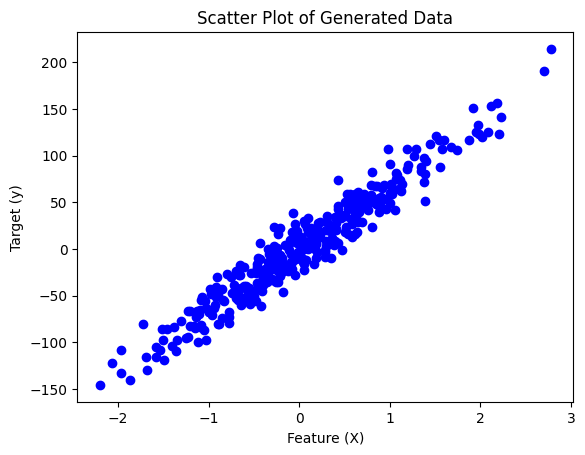

In [79]:
# Scatter plot of the data points
plt.scatter(X_train, y_train, color='blue', marker='o', label='Data points')

# Add labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Scatter Plot of Generated Data')

# Display the plot
plt.show()


In [80]:
ridgeReg = RidgeRegression()
ridgeReg.fit(X_train, y_train)
predictions = ridgeReg.predict(X_test)
print(predictions)

[-6.29393588e+01  1.07755382e+02  2.80005823e+01 -7.14658518e+01
 -7.32528137e+01  1.49537376e+02 -8.41728941e+00  1.28161415e+02
 -2.45040937e+01  9.22989720e+01  6.66758543e+01  8.09564688e+01
 -2.19667310e+01 -9.50167389e+01 -1.11622645e+02 -1.05844081e+02
 -1.16237874e+01  5.50705173e+01 -7.88528589e+01 -7.55594082e+00
 -1.04216536e+02  5.34679508e+01  8.44604026e+01 -5.12553414e+01
  1.27671523e+02  2.29456254e+00 -2.31444413e+01  1.45771043e+01
 -3.07432364e+01  3.35403106e+01 -7.23965985e+01  4.43434664e+01
  3.13010129e+00 -1.82444478e+01  3.51048026e+01  1.95138514e+01
 -1.23591511e+02  7.50189100e+00  4.28241148e+01 -3.19054108e+01
  1.09995455e+02  1.60193548e+02 -9.65934693e+01  6.84507309e+01
  2.31528043e+01 -2.22952945e+01 -1.60702796e+02  1.33888344e+02
  1.11487151e+02 -8.77231480e+01 -6.53952757e+01 -1.51223690e+02
  2.79342311e+01  5.44465570e+01 -7.48961788e+01 -1.55519105e+02
 -2.79263692e+01 -8.88990191e+01  9.05399730e+01  1.84408949e+01
 -7.89727955e+01  1.14986

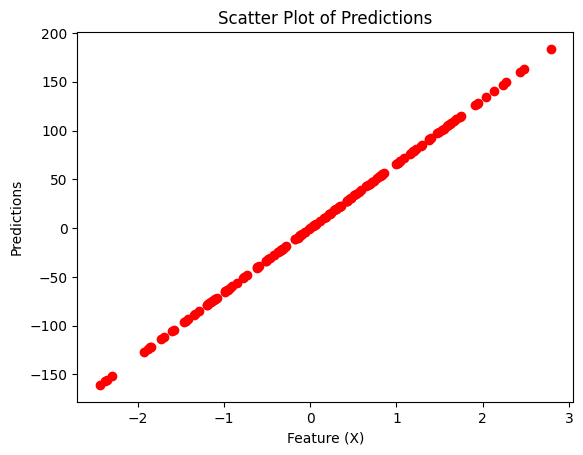

In [81]:
# Scatter plot of the data points
plt.scatter(X_test, predictions, color='red', marker='o', label='Predictions')

# Add labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Predictions')
plt.title('Scatter Plot of Predictions')

# Display the plot
plt.show()

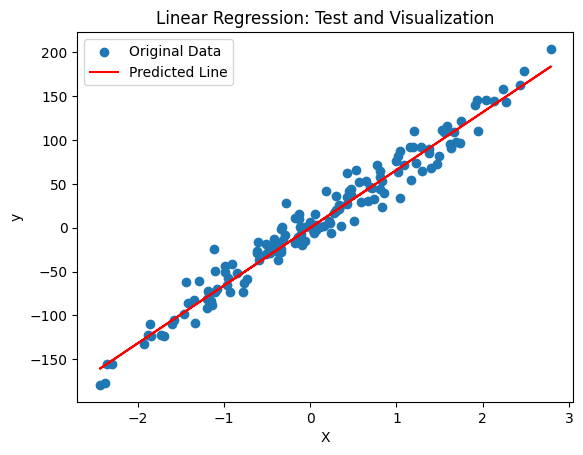

In [82]:
plt.scatter(X_test, y_test, label='Original Data')
plt.plot(X_test, predictions, color='red', label='Predicted Line')

    # Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression: Test and Visualization')

    # Add a legend
plt.legend()

    # Display the plot
plt.show()